In [1]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

# Los Angeles Data

## ENERGY


In [2]:
file_LAdemand0117 = 'LA_LDWP_20170101_20170114_Demand.csv'
LAdemand0117 = pd.read_csv(file_LAdemand0117, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_LAdemand0417 = 'LA_LDWP_20170401_20170414_Demand.csv'
LAdemand0417 = pd.read_csv(file_LAdemand0417, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_LAdemand0717 = 'LA_LDWP_20170701_20170714_Demand.csv'
LAdemand0717 = pd.read_csv(file_LAdemand0717, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_LAdemand1017 = 'LA_LDWP_20171001_20171014_Demand.csv'
LAdemand1017 = pd.read_csv(file_LAdemand1017, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

LAdemand17 = LAdemand1017.append(LAdemand0717.append(LAdemand0417.append(LAdemand0117)))
LAdemand17.index = pd.to_datetime(LAdemand17.index)
LAdemand17.index = LAdemand17.index.tz_localize('US/Pacific')
LAdemand17['Hour'] = LAdemand17.index.hour

## WEATHER

In [3]:
file_LAweather0117 = 'LA_KCQT_20170101_20170114_Weather.csv'
LAweather0117 = pd.read_csv(file_LAweather0117, parse_dates = [[0,1]], encoding = 'cp1252')
LAweather0117 = LAweather0117.set_index('Date_Time (PST)')

file_LAweather0417 = 'LA_KCQT_20170401_20170414_Weather.csv'
LAweather0417 = pd.read_csv(file_LAweather0417, parse_dates = [[0,1]], encoding = 'cp1252')
LAweather0417 = LAweather0417.set_index('Date_Time (PDT)')

file_LAweather0717 = 'LA_KCQT_20170701_20170714_Weather.csv'
LAweather0717 = pd.read_csv(file_LAweather0717, parse_dates = [[0,1]], encoding = 'cp1252')
LAweather0717 = LAweather0717.set_index('Date_Time (PDT)')

file_LAweather1017 = 'LA_KCQT_20171001_20171014_Weather.csv'
LAweather1017 = pd.read_csv(file_LAweather1017, parse_dates = [[0,1]], encoding = 'cp1252')
LAweather1017 = LAweather1017.set_index('Date_Time (PDT)')

LAweather17 = LAweather0117.append(LAweather0417.append(LAweather0717.append(LAweather1017)))
LAweather17.index = pd.to_datetime(LAweather17.index)
LAweather17.index = LAweather17.index.tz_localize('US/Pacific')
LAweather17.drop( ['Wind Dir','Events','Conditions'], axis = 1, inplace = True)

## COMBINED

In [4]:
LAweather17 =  LAweather17[~LAweather17.index.duplicated(keep='last')]
combined_LA17 = LAdemand17.join(LAweather17.reindex(LAdemand17.index.unique(), method='nearest'))
for i in range(1,len(combined_LA17.columns.values)-1):
    try:
        combined_LA17.iloc[:,i] = combined_LA17.iloc[:,i].str.extract('(\d+)') 
    except:
        continue
combined_LA17.fillna(value = 0, inplace = True)
combined_LA17 = combined_LA17.convert_objects(convert_numeric=True)
combined_LA17['Population'] = np.full((len(combined_LA17),1),int(1505000))
combined_LA17.rename(index=str, columns={"LDWP demand megawatthours": "Demand"}, inplace = True)

combined_LA17.head()

C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\joann\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((1348, 1), 1505000) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


,Demand,Hour,Temp.,Dew Point,Humidity,Pressure,Visibility,Wind Speed,Gust Speed,Precip,Population
Category,,,,,,,,,,,
2017-10-15 00:00:00-07:00,2793,0,66,57,73,29,8,0,0,0.0,1505000.0
2017-10-14 23:00:00-07:00,3014,23,68,57,70,29,8,0,0,0.0,1505000.0
2017-10-14 22:00:00-07:00,3232,22,68,57,70,29,8,0,0,0.0,1505000.0
2017-10-14 21:00:00-07:00,3392,21,69,57,68,29,10,0,0,0.0,1505000.0
2017-10-14 20:00:00-07:00,3522,20,70,57,63,29,10,0,0,0.0,1505000.0


# City of Tacoma

## ENERGY

In [5]:
file_WAdemand0117 = 'WA_TPWR_20170101_20170114_Demand.csv'
WAdemand0117 = pd.read_csv(file_WAdemand0117, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_WAdemand0417 = 'WA_TPWR_20170401_20170414_Demand.csv'
WAdemand0417 = pd.read_csv(file_WAdemand0417, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_WAdemand0717 = 'WA_TPWR_20170701_20170714_Demand.csv'
WAdemand0717 = pd.read_csv(file_WAdemand0717, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_WAdemand1017 = 'WA_TPWR_20171001_20171014_Demand.csv'
WAdemand1017 = pd.read_csv(file_WAdemand1017, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

WAdemand17 = WAdemand1017.append(WAdemand0717.append(WAdemand0417.append(WAdemand0117)))
WAdemand17.index = pd.to_datetime(WAdemand17.index)
WAdemand17.index = WAdemand17.index.tz_localize('US/Pacific')
WAdemand17['Hour'] = WAdemand17.index.hour
WAdemand17.head()

,TPWR demand megawatthours,Hour
Category,,
2017-10-15 00:00:00-07:00,489,0
2017-10-14 23:00:00-07:00,514,23
2017-10-14 22:00:00-07:00,537,22
2017-10-14 21:00:00-07:00,557,21
2017-10-14 20:00:00-07:00,569,20


## WEATHER

In [6]:
file_WAweather0117 = 'WA_KTIW_20170101_20170114_Weather.csv'
WAweather0117 = pd.read_csv(file_WAweather0117, parse_dates = [[0,1]], encoding = 'cp1252')
WAweather0117 = WAweather0117.set_index('Date_Time (PST)')

file_WAweather0417 = 'WA_KTIW_20170401_20170414_Weather.csv'
WAweather0417 = pd.read_csv(file_WAweather0417, parse_dates = [[0,1]], encoding = 'cp1252')
WAweather0417 = WAweather0417.set_index('Date_Time (PDT)')

file_WAweather0717 = 'WA_KTIW_20170701_20170714_Weather.csv'
WAweather0717 = pd.read_csv(file_WAweather0717, parse_dates = [[0,1]], encoding = 'cp1252')
WAweather0717 = WAweather0717.set_index('Date_Time (PDT)')

file_WAweather1017 = 'WA_KTIW_20171001_20171014_Weather.csv'
WAweather1017 = pd.read_csv(file_WAweather1017, parse_dates = [[0,1]], encoding = 'cp1252')
WAweather1017 = WAweather1017.set_index('Date_Time (PDT)')

WAweather17 = WAweather0117.append(WAweather0417.append(WAweather0717.append(WAweather1017)))
print(WAweather17.index)
WAweather17.index = pd.to_datetime(WAweather17.index)

WAweather17.index = WAweather17.index.tz_localize('US/Pacific')
WAweather17.drop( ['Wind Dir','Events','Conditions'], axis = 1, inplace = True)

WAweather17.head()

DatetimeIndex(['2017-01-01 00:53:00', '2017-01-01 01:18:00',
               '2017-01-01 01:49:00', '2017-01-01 01:53:00',
               '2017-01-01 02:32:00', '2017-01-01 02:53:00',
               '2017-01-01 03:24:00', '2017-01-01 03:37:00',
               '2017-01-01 03:53:00', '2017-01-01 04:18:00',
               ...
               '2017-10-14 14:53:00', '2017-10-14 15:53:00',
               '2017-10-14 16:53:00', '2017-10-14 17:53:00',
               '2017-10-14 18:53:00', '2017-10-14 19:53:00',
               '2017-10-14 20:53:00', '2017-10-14 21:53:00',
               '2017-10-14 22:53:00', '2017-10-14 23:53:00'],
              dtype='datetime64[ns]', length=1544, freq=None)


,Temp.,Dew Point,Humidity,Pressure,Visibility,Wind Speed,Gust Speed,Precip
2017-01-01 00:53:00-08:00,36.0 °F,34.0 °F,93%,29.74 in,10.0 mi,6.9 mph,-,NaN
2017-01-01 01:18:00-08:00,35.1 °F,34.0 °F,96%,29.72 in,10.0 mi,8.1 mph,-,0.01 in
2017-01-01 01:49:00-08:00,35.6 °F,33.8 °F,93%,29.71 in,10.0 mi,6.9 mph,-,0.01 in
2017-01-01 01:53:00-08:00,35.1 °F,34.0 °F,96%,29.72 in,10.0 mi,8.1 mph,-,0.01 in
2017-01-01 02:32:00-08:00,34.0 °F,33.1 °F,96%,29.70 in,10.0 mi,5.8 mph,-,NaN


## COMBINED

In [7]:

WAweather17 = WAweather17[~WAweather17.index.duplicated(keep='last')]
combined_WA17 = WAdemand17.join(WAweather17.reindex(WAdemand17.index.unique(), method='nearest'))
for i in range(1,len(combined_WA17.columns.values)-1):
    try:
        combined_WA17.iloc[:,i] = combined_WA17.iloc[:,i].str.extract('(\d+)') 
    except:
        continue
combined_WA17.fillna(value = 0, inplace = True)
combined_WA17 = combined_WA17.convert_objects(convert_numeric=True)
combined_WA17['Population'] = np.full((len(combined_WA17),1),int(173664))
combined_WA17.rename(index=str, columns={"TPWR demand megawatthours": "Demand"}, inplace = True)
combined_WA17.head()

C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\joann\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((1348, 1), 173664) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


,Demand,Hour,Temp.,Dew Point,Humidity,Pressure,Visibility,Wind Speed,Gust Speed,Precip,Population
Category,,,,,,,,,,,
2017-10-15 00:00:00-07:00,489,0,48,44,86,30,10,4,0,0.0,173664.0
2017-10-14 23:00:00-07:00,514,23,48,42,77,30,10,0,0,0.0,173664.0
2017-10-14 22:00:00-07:00,537,22,51,39,66,30,10,0,0,0.0,173664.0
2017-10-14 21:00:00-07:00,557,21,52,39,63,30,10,0,0,0.0,173664.0
2017-10-14 20:00:00-07:00,569,20,53,41,64,30,10,0,0,0.0,173664.0


# Tampa

## ENERGY

In [8]:
file_FLdemand0117 = 'FL_TEC_20170101_20170114_Demand.csv'
FLdemand0117 = pd.read_csv(file_FLdemand0117, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_FLdemand0417 = 'FL_TEC_20170401_20170414_Demand.csv'
FLdemand0417 = pd.read_csv(file_FLdemand0417, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_FLdemand0717 = 'FL_TEC_20170701_20170714_Demand.csv'
FLdemand0717 = pd.read_csv(file_FLdemand0717, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_FLdemand1017 = 'FL_TEC_20171001_20171014_Demand.csv'
FLdemand1017 = pd.read_csv(file_FLdemand1017, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

FLdemand17 = FLdemand1017.append(FLdemand0717.append(FLdemand0417.append(FLdemand0117)))
FLdemand17.index = pd.to_datetime(FLdemand17.index)
FLdemand17.index = FLdemand17.index.tz_localize('US/Eastern')
FLdemand17['Hour'] = FLdemand17.index.hour

## WEATHER

In [9]:
file_FLweather0117 = 'FL_KTPF_20170101_20170114_Weather.csv'
FLweather0117 = pd.read_csv(file_FLweather0117, parse_dates = [[0,1]], encoding = 'cp1252')
FLweather0117 = FLweather0117.set_index('Date_Time (EST)')


file_FLweather0417 = 'FL_KTPF_20170401_20170414_Weather.csv'
FLweather0417 = pd.read_csv(file_FLweather0417, parse_dates = [[0,1]], encoding = 'cp1252')
FLweather0417 = FLweather0417.set_index('Date_Time (EDT)')


file_FLweather0717 = 'FL_KTPF_20170701_20170714_Weather.csv'
FLweather0717 = pd.read_csv(file_FLweather0717, parse_dates = [[0,1]], encoding = 'cp1252')
FLweather0717 = FLweather0717.set_index('Date_Time (EDT)')


file_FLweather1017 = 'FL_KTPF_20171001_20171014_Weather.csv'
FLweather1017 = pd.read_csv(file_FLweather1017, parse_dates = [[0,1]], encoding = 'cp1252')
FLweather1017 = FLweather1017.set_index('Date_Time (EDT)')


FLweather17 = FLweather0117.append(FLweather0417.append(FLweather0717.append(FLweather1017)))
FLweather17.index = pd.to_datetime(FLweather17.index)

FLweather17.index = FLweather17.index.tz_localize('US/Eastern')
FLweather17.drop( ['Wind Dir','Events','Conditions'], axis = 1, inplace = True)

## COMBINED

In [10]:
FLweather17 = FLweather17[~FLweather17.index.duplicated(keep='last')]
combined_FL17 = FLdemand17.join(FLweather17.reindex(FLdemand17.index.unique(), method='nearest'))
for i in range(1,len(combined_FL17.columns.values)-1):
    try:
        combined_FL17.iloc[:,i] = combined_FL17.iloc[:,i].str.extract('(\d+)') 
    except:
        continue
combined_FL17.fillna(value = 0, inplace = True)
combined_FL17 = combined_FL17.convert_objects(convert_numeric=True)
combined_FL17['Population'] = np.full((len(combined_FL17),1),int(725000 ))
combined_FL17.rename(index=str, columns={"TEC demand megawatthours": "Demand"}, inplace = True)
combined_FL17.head()

C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\joann\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((1348, 1), 725000) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


,Demand,Hour,Temp.,Dew Point,Humidity,Pressure,Visibility,Wind Speed,Gust Speed,Precip,Population
Category,,,,,,,,,,,
2017-10-15 00:00:00-04:00,2272,0,73,68,83,30,10,5,0,0.0,725000.0
2017-10-14 23:00:00-04:00,2491,23,73,68,83,30,10,5,0,0.0,725000.0
2017-10-14 22:00:00-04:00,2691,22,75,68,78,30,10,8,0,0.0,725000.0
2017-10-14 21:00:00-04:00,2842,21,77,68,74,30,10,5,0,0.0,725000.0
2017-10-14 20:00:00-04:00,2971,20,78,69,74,30,10,6,0,0.0,725000.0


# Missouri


## ENERGY

In [11]:
file_MOdemand0117 = 'MO_AECI_20170101_20170114_Demand.csv'
MOdemand0117 = pd.read_csv(file_MOdemand0117, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_MOdemand0417 = 'MO_AECI_20170401_20170414_Demand.csv'
MOdemand0417 = pd.read_csv(file_MOdemand0417, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_MOdemand0717 = 'MO_AECI_20170701_20170714_Demand.csv'
MOdemand0717 = pd.read_csv(file_MOdemand0717, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_MOdemand1017 = 'MO_AECI_20171001_20171014_Demand.csv'
MOdemand1017 = pd.read_csv(file_MOdemand1017, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

MOdemand17 = MOdemand1017.append(MOdemand0717.append(MOdemand0417.append(MOdemand0117)))
MOdemand17.index = pd.to_datetime(MOdemand17.index)
MOdemand17.index = MOdemand17.index.tz_localize('US/Central')
MOdemand17['Hour'] = MOdemand17.index.hour

## WEATHER

In [12]:
file_MOweather0117 = 'MO_KJEF_20170101_20170114_Weather.csv'
MOweather0117 = pd.read_csv(file_MOweather0117, parse_dates = [[0,1]], encoding = 'cp1252')
MOweather0117 = MOweather0117.set_index('Date_Time (CST)')

file_MOweather0417 = 'MO_KJEF_20170401_20170414_Weather.csv'
MOweather0417 = pd.read_csv(file_MOweather0417, parse_dates = [[0,1]], encoding = 'cp1252')
MOweather0417 = MOweather0417.set_index('Date_Time (CDT)')

file_MOweather0717 = 'MO_KJEF_20170701_20170714_Weather.csv'
MOweather0717 = pd.read_csv(file_MOweather0717, parse_dates = [[0,1]], encoding = 'cp1252')
MOweather0717 = MOweather0717.set_index('Date_Time (CDT)')

file_MOweather1017 = 'MO_KJEF_20171001_20171014_Weather.csv'
MOweather1017 = pd.read_csv(file_MOweather1017, parse_dates = [[0,1]], encoding = 'cp1252')
MOweather1017 = MOweather1017.set_index('Date_Time (CDT)')

MOweather17 = MOweather0117.append(MOweather0417.append(MOweather0717.append(MOweather1017)))
MOweather17.index = pd.to_datetime(MOweather17.index)
MOweather17.index = MOweather17.index.tz_localize('US/Central')
MOweather17.drop( ['Wind Dir','Events','Conditions'], axis = 1, inplace = True)

## COMBINED

In [13]:
MOweather17 = MOweather17[~MOweather17.index.duplicated(keep='last')]
combined_MO17 = MOdemand17.join(MOweather17.reindex(MOdemand17.index.unique(), method='nearest'))
for i in range(1,len(combined_MO17.columns.values)-1):
    try:
        combined_MO17.iloc[:,i] = combined_MO17.iloc[:,i].str.extract('(\d+)') 
    except:
        continue
combined_MO17.fillna(value = 0, inplace = True)
combined_MO17 = combined_MO17.convert_objects(convert_numeric=True)
combined_MO17['Population'] = np.full((len(combined_MO17),1),int(910000))
combined_MO17.rename(index=str, columns={"AECI demand megawatthours": "Demand"}, inplace = True)
combined_MO17.head()

C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\joann\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((1348, 1), 910000) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


,Demand,Hour,Temp.,Dew Point,Humidity,Pressure,Visibility,Wind Speed,Gust Speed,Precip,Population
Category,,,,,,,,,,,
2017-10-15 00:00:00-05:00,2001,0,69,64,84,29,4,8,0,NaN,910000.0
2017-10-14 23:00:00-05:00,2184,23,69,64,87,29,10,3,0,0.0,910000.0
2017-10-14 22:00:00-05:00,2380,22,73,66,76,29,10,5,0,0.0,910000.0
2017-10-14 21:00:00-05:00,2503,21,75,64,71,29,10,5,0,0.0,910000.0
2017-10-14 20:00:00-05:00,2698,20,80,63,56,29,10,0,0,0.0,910000.0


# New Mexico

## ENERGY

In [14]:
file_NMdemand0117 = 'NM_PNM_20170101_20170114_Demand.csv'
NMdemand0117 = pd.read_csv(file_NMdemand0117, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_NMdemand0417 = 'NM_PNM_20170401_20170414_Demand.csv'
NMdemand0417 = pd.read_csv(file_NMdemand0417, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_NMdemand0717 = 'NM_PNM_20170701_20170714_Demand.csv'
NMdemand0717 = pd.read_csv(file_NMdemand0717, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

file_NMdemand1017 = 'NM_PNM_20171001_20171014_Demand.csv'
NMdemand1017 = pd.read_csv(file_NMdemand1017, skiprows=[0,1,2,3],index_col=0, usecols=[0,1], parse_dates=[0])

NMdemand17 = NMdemand1017.append(NMdemand0717.append(NMdemand0417.append(NMdemand0117)))
NMdemand17.index = pd.to_datetime(NMdemand17.index)
NMdemand17.index = NMdemand17.index.tz_localize('US/Mountain')
NMdemand17['Hour'] = NMdemand17.index.hour

## WEATHER

In [15]:
file_NMweather0117 = 'NM_KABQ_20170101_20170114_Weather.csv'
NMweather0117 = pd.read_csv(file_NMweather0117, parse_dates = [[0,1]], encoding = 'cp1252')
NMweather0117 = NMweather0117.set_index('Date_Time (MST)')

file_NMweather0417 = 'NM_KABQ_20170401_20170414_Weather.csv'
NMweather0417 = pd.read_csv(file_NMweather0417, parse_dates = [[0,1]], encoding = 'cp1252')
NMweather0417 = NMweather0417.set_index('Date_Time (MDT)')

file_NMweather0717 = 'NM_KABQ_20170701_20170714_Weather.csv'
NMweather0717 = pd.read_csv(file_NMweather0717, parse_dates = [[0,1]], encoding = 'cp1252')
NMweather0717 = NMweather0717.set_index('Date_Time (MDT)')

file_NMweather1017 = 'NM_KABQ_20171001_20171014_Weather.csv'
NMweather1017 = pd.read_csv(file_NMweather1017, parse_dates = [[0,1]], encoding = 'cp1252')
NMweather1017 = NMweather1017.set_index('Date_Time (MDT)')

NMweather17 = NMweather0117.append(NMweather0417.append(NMweather0717.append(NMweather1017)))
NMweather17.index = pd.to_datetime(NMweather17.index)
NMweather17.index = NMweather17.index.tz_localize('US/Mountain')
NMweather17.drop( ['Wind Dir','Events','Conditions'], axis = 1, inplace = True)

## COMBINED

In [16]:
NMweather17 = NMweather17[~NMweather17.index.duplicated(keep='last')]
combined_NM17 = NMdemand17.join(NMweather17.reindex(NMdemand17.index.unique(), method='nearest'))
for i in range(1,len(combined_NM17.columns.values)-1):
    try:
        combined_NM17.iloc[:,i] = combined_NM17.iloc[:,i].str.extract('(\d+)') 
    except:
        continue
combined_NM17.fillna(value = 0, inplace = True)
combined_NM17 = combined_NM17.convert_objects(convert_numeric=True)
combined_NM17['Population'] = np.full((len(combined_NM17),1),int(500000))
combined_NM17.rename(index=str, columns={"PNM demand megawatthours": "Demand"}, inplace = True)
combined_NM17.head()

C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\Users\joann\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\joann\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full((1348, 1), 500000) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


,Demand,Hour,Temp.,Dew Point,Humidity,Pressure,Visibility,Wind Speed,Gust Speed,Precip,Population
Category,,,,,,,,,,,
2017-10-15 00:00:00-06:00,1333,0,57,10,15,30,10,15,0,0.0,500000.0
2017-10-14 23:00:00-06:00,1422,23,60,9,13,30,10,15,0,0.0,500000.0
2017-10-14 22:00:00-06:00,1508,22,62,10,13,30,10,12,0,0.0,500000.0
2017-10-14 21:00:00-06:00,1568,21,64,12,14,30,10,11,0,0.0,500000.0
2017-10-14 20:00:00-06:00,1608,20,68,12,12,30,10,11,0,0.0,500000.0


In [17]:
'''
Appending all dataframes
'''
raw_set = combined_LA17.append(combined_WA17.append(combined_FL17.append(combined_MO17.append(combined_NM17))))

#raw_set.to_csv('all_data.csv')

In [18]:
#raw_set = pd.read_csv('all_data.csv')

## Part 2: Modeling
### Option 1: Gaussian Process Regression
Gaussian Processes (GP) are a generic supervised learning method designed to solve regression and probabilistic classification problems. In a Gaussian Process regression, inputs that are judged to be close to each other as a result of the covariance function are likely to have similar outputs. A prediction is made by considering the covariance between the predictive case and all the training cases

In [19]:
%matplotlib inline 
import sklearn.decomposition
import sklearn.metrics
from sklearn import gaussian_process
from sklearn import cross_validation
from sklearn.model_selection import train_test_split

C:\Users\joann\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
"""
Modified gaussian_process.py at line 311 to account for multiple input with same target value issue
"""
def predict(theta, nugget, trainX, trainY, testX, testY, testSet):

    gp = gaussian_process.GaussianProcess(theta0=theta, nugget=nugget)
    gp.fit(trainX, trainY)



    predictedY, MSE = gp.predict(testX, eval_MSE = True)
    sigma = np.sqrt(MSE)

    results = testSet.copy()
    results['predictedY'] = predictedY
    results['sigma'] = sigma

    print ("Train score R2:", gp.score(trainX, trainY))
    print ("Test score R2:", sklearn.metrics.r2_score(testY, predictedY))

    return gp, results

In [21]:
raw_set = combined_LA17.append(combined_WA17.append(combined_FL17.append(combined_MO17.append(combined_NM17))))

raw_set.drop_duplicates(subset = ['Demand'],inplace = True)
raw_set = raw_set[~raw_set.index.duplicated()]
trainX, testX, trainY, testY = train_test_split(raw_set.drop('Demand', axis = 1).fillna(0), raw_set['Demand'], test_size=0.33, random_state=42)
gp_price, results_price = predict(100, 10, trainX, trainY, testX, testY, pd.concat((testX,testY), axis=1) )

# print(testX)
# print(testY)

C:\Users\joann\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\joann\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


Exception: Multiple input features cannot have the same target value.

### Option 2: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
raw_set = combined_LA17.append(combined_WA17.append(combined_FL17.append(combined_MO17.append(combined_NM17))))
trainX, testX, trainY, testY = train_test_split(raw_set.drop('Demand', axis = 1).fillna(0), raw_set['Demand'], test_size=0.33, random_state=42)

lr = LinearRegression()
lr.fit(trainX, trainY)
y_lr = lr.predict(testX)
print ("The test score R2: ", lr.score(testX, testY))
print ("The Linear Regression coefficients are")
pd.DataFrame(list(zip(trainX.columns.values, lr.coef_)), columns = ['elect_features', 'linearRegr_Coefficients'])

In [ ]:
plt.scatter(testY,y_lr)
plt.plot(testY,testY)
plt.xlabel('Actual Demand (MW hr)')
plt.ylabel('Predicted Demand (MW hr)')

### Option 3: Random Forests Regression
Not able to get an acceptable score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
import seaborn as sns

In [ ]:
trainX, testX, trainY, testY = train_test_split(raw_set.drop('Demand', axis = 1).fillna(0), raw_set['Demand'], test_size=0.33, random_state=42)
scores = pd.DataFrame()
raw_set = combined_LA17.append(combined_WA17.append(combined_FL17.append(combined_MO17.append(combined_NM17))))
RF = RandomForestRegressor(n_estimators=4000, max_depth=None, min_samples_split=1.0, random_state=42)
score = cross_val_score(RF, trainX, trainY,cv=5)



In [ ]:
score

In [ ]:
sns.set_context("talk")
sns.set_style("white")

sns.boxplot(np.matrix(scores))
plt.xlabel("Number of trees")
plt.ylabel("Scores")
plt.title("The scores of the Random Forests for different number of trees.")
plt.xlim(0,41)
plt.show()


### Option 4: Support Vector Regression

In [22]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn import grid_search
from sklearn.model_selection import StratifiedShuffleSplit

pd.options.display.mpl_style = 'default'

C:\Users\joann\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\joann\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
raw_set = combined_LA17.append(combined_WA17.append(combined_FL17.append(combined_MO17.append(combined_NM17))))
trainX, testX, trainY, testY = train_test_split(raw_set.drop('Demand', axis = 1).fillna(0), raw_set['Demand'], test_size=0.33, random_state=42)


In [35]:

# search for the best parameters with crossvalidation.
#svr_elect = GridSearchCV(SVR(C=2000, gamma=0.01), param_grid = tuned_parameters, verbose = 0)
sve_elect = SVR(C=2000, epsilon=0.2, gamma = 0.01)
# Fit regression model
y_elect = sve_elect.fit(trainX, trainY).predict(testX)
print ("The test score R2 for SVR: {}".format (sve_elect.score(testX, testY)))


The test score R2 for SVR: 0.9660711034610555


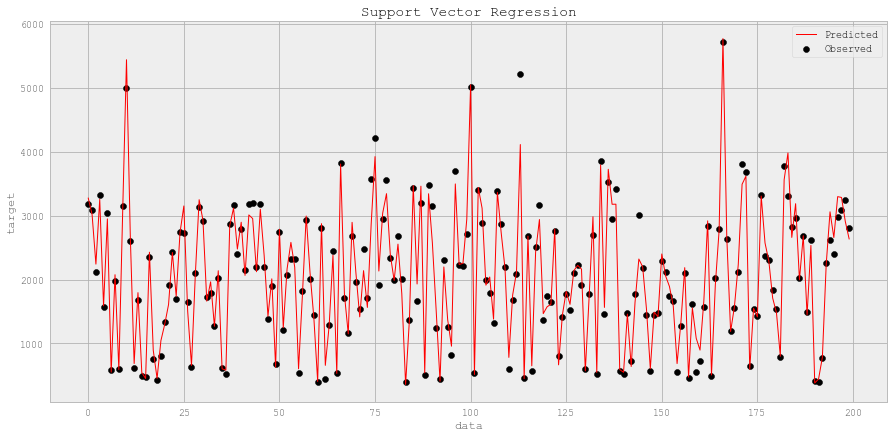

In [36]:
#Plot time series of observed and predicted electricity demand over the testing period.
fig = plt.figure(figsize=(15,7))
plt.scatter(np.arange(len(testY.iloc[0:200])), testY.iloc[0:200], c='k', label='Observed')
plt.plot(np.arange(len(testY.iloc[0:200])), y_elect[0:200], c='r', label='Predicted')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

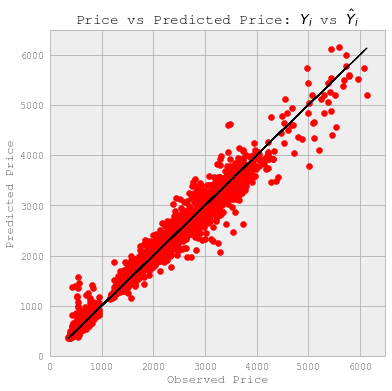

In [37]:
#Plot Observed vs. predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(testY, testY, c='k')
plt.scatter(testY, y_elect, c='r')
plt.xlabel('Observed Price')
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price: $Y_i$ vs $\hat{Y}_i$")

In [39]:
testX['predictedY'] = y_elect

In [40]:
testX.to_csv('predicted_demand.csv')